# Machine Learning - Homework 2

In [41]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

%matplotlib inline

In [42]:
# set the seeds for reproducibility
random.seed(412)
np.random.seed(412)

# Generate Data for Regression

In [43]:
def mapping(x, slope, bias):
  y = slope * x + bias  # linear function
  return y


def generate_data(f, N, x_min, x_max):
  x_standard = np.random.rand(N, 1) # x values uniformly sampled from range [0, 1]
  x = x_standard * (x_max - x_min) + x_min   # carrying x values to the desired range [x_min, x_max]
  y = f(x) # compute y values from the underlying function f
  eps = 0.1 * np.random.randn(*y.shape)   # Gaussian noise with 0.1 standard deviation
  return x, y + eps   # return x's and corrupted f(x) values

In [44]:
### PARAMETERS FOR THE DATA GENERATION ###
slope, bias = 2.5, 0.5    # slope (w1) and bias (w0) of the linear component
x_min, x_max = 0.0, 1.0   # range of x values
N = 50                   # number of samples

# set the slope, bias parameters of the mapping() function; leave x
f = lambda x : mapping(x, slope=slope, bias=bias)

# generate N samples with function f, where the x is in range [x_min, x_max]
x, y = generate_data(f, N, x_min, x_max)
print('x.shape :', x.shape, ', y.shape :', y.shape)

x.shape : (50, 1) , y.shape : (50, 1)


### 50% Train 50% Validation Split

In [45]:
# Partition the dataset into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Make a scatter plot of the data

In [46]:
def plot_samples(train_data, val_data=None):
  fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

  x_train, y_train = train_data
  ax.scatter(x_train, y_train, label='train samples')
  if val_data:
    x_val, y_val = val_data
    ax.scatter(x_val, y_val, label='val samples')

  ax.set_xlim([-0.05, 1.05])  # need to change
  ax.set_ylim([-0.05, 3.55])  # need to change
  ax.set_xlabel('x', fontsize=12)
  ax.set_ylabel('f(x)', fontsize=12)
  ax.set_title('Simulated Nonlinear Data')
  ax.legend(loc='lower right')
  return fig, ax

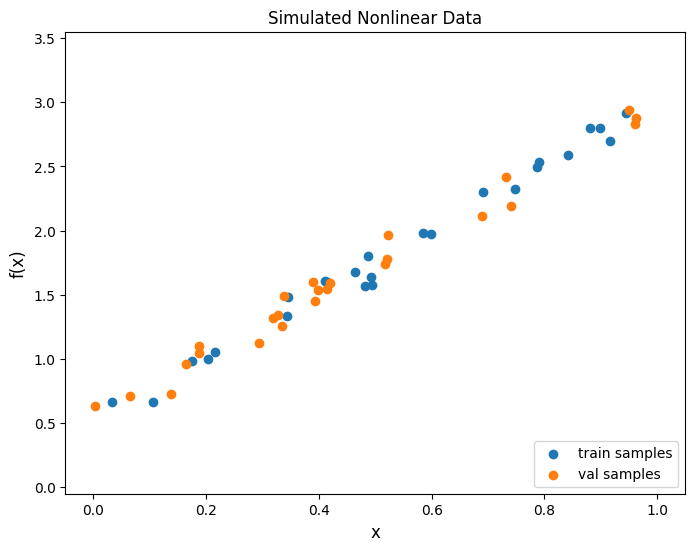

In [47]:
# Plot train and test datasets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val))

# Function for plotting the MSE loss
This function is defined to plot the Mean Squared Error loss across training iterations.
Ensure this function is executed before it is called in subsequent cells of this notebook.

In [48]:
def plot_mse_loss(mse_values):
  plt.figure(figsize=(10, 6))
  plt.plot(mse_values, label='MSE per Iteration')
  plt.xlabel('Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title('MSE During Training')
  plt.legend()
  plt.show()

In [49]:
del x, y, x_train, y_train, x_val, y_val # I am deleting the variables so that you can start from scratch

#**Your job starts here!**

In this homework, we'll explore different regression techniques and their applications using sklearn and NumPy libraries. We'll start by considering **Dataset 1** (see the PDF document for this homework), which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), and use linear regression to model this relationship.

First, let's generate Dataset 1:



In [51]:
# Generate Dataset 1 using the provided function and parameters
x, y = generate_data(f, N, x_min, x_max)
print('x.shape:', x.shape, ', y.shape:', y.shape)

# Split the data into 50% training and 50% validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)
print('x_train.shape:', x_train.shape, ', y_train.shape:', y_train.shape)
print('x_val.shape:', x_val.shape, ', y_val.shape:', y_val.shape)


x.shape: (50, 1) , y.shape: (50, 1)
x_train.shape: (25, 1) , y_train.shape: (25, 1)
x_val.shape: (25, 1) , y_val.shape: (25, 1)


# Part 1.a

Our objective in Part 1.a is to use sklearn's linear regression model on Dataset 1. The main steps are as follows:  

1.   Initialize the model
2.   Fit it to the data
3.   Make predictions on the validation set

Then, we will evaluate the performance of the model on the validation set using the **mean squared error (MSE)** metric and print the result.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Find the model's predictions on the validation set
y_val_pred = model.predict(x_val)

# Evaluate the model's performance on the validation set using mean squared error (MSE)
mse_sklearn = mean_squared_error(y_val, y_val_pred)
print('MSE of sklearn model: ', mse_sklearn)


MSE of sklearn model:  0.00795462682779033


Next, we'll visualize the linear regression model's fit to Dataset 1 by drawing the **regression line** onto a scatter plot of the train and validation samples. To do this:

1.   Make a scatter plot of train and validation samples using the **plot_samples()** function.
2.   Draw the regression line onto this plot by following the directions in the comments.

By looking at the plot, we can get an idea of how well the linear regression model fits the data.

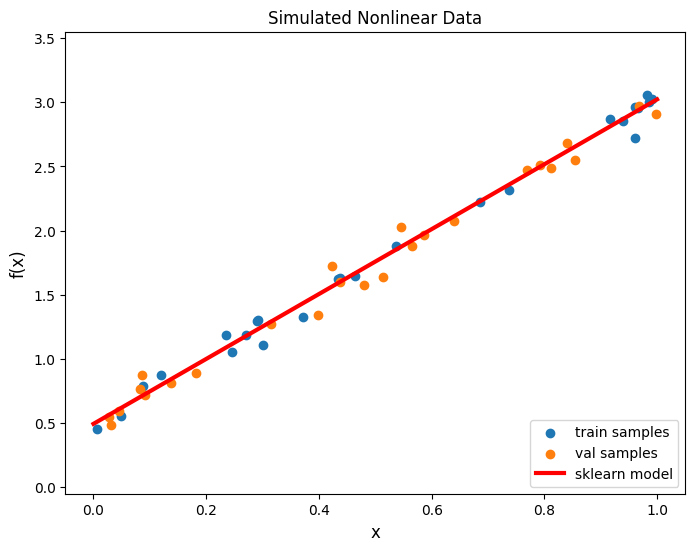

In [54]:
# Make a scatter plot of the train and validation samples using plot_samples()
fig, ax = plot_samples((x_train, y_train), (x_val, y_val))

x_grid = np.linspace(x_min, x_max, 100)  # Generate a grid of x values
y_grid = model.predict(x_grid.reshape(-1, 1))  # Predict y values on the grid using the trained model

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model')
ax.legend(loc='lower right')


Great! Now you know how to find the regression coefficients using the sklearn's linear regression model, and how to plot the regression line. Let's proceed to **Part 1.b**

# Part 1.b

In this part, we will use the pseudo-inverse solution manually to find the optimal regression coefficients. The main steps are as follows:

1.   Constructing the extended data matrix **X** that includes a column of ones for the bias (intercept) term.
2.   Taking the pseudo-inverse (pinv) of **X**.
3.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**.

*(Note that pinv(**X**) is a 2 x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions 2 x 1)*

In [56]:
from numpy.linalg import pinv

# Construct the extended data matrix for training by adding a column of ones
X_train_ext = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
# Construct the extended data matrix for validation
X_val_ext = np.concatenate((np.ones((x_val.shape[0], 1)), x_val), axis=1)

# Print the shapes of the extended data matrices to check
print('X_train_ext shape:', X_train_ext.shape)
print('X_val_ext shape:', X_val_ext.shape)

# Find the pseudoinverse of the extended training data matrix
X_train_pinv = pinv(X_train_ext)

# Compute the regression coefficients w using the pseudoinverse method
w = X_train_pinv @ y_train
print('Regression coefficients (w):', w.ravel())

# Make predictions on the validation set using the computed coefficients
y_val_pred_manual = X_val_ext @ w

# Evaluate the model's performance on the validation set using mean squared error (MSE)
mse_manual = np.sum((y_val_pred_manual - y_val)**2) / (2 * len(y_val))
print('MSE of manual model: ', mse_manual)


X_train_ext shape: (25, 2)
X_val_ext shape: (25, 2)
Regression coefficients (w): [0.49447669 2.52838262]
MSE of manual model:  0.003977313413895187


Now that you have implemented your own linear regression algorithm and found the regression coefficients, let's visualize the results.

We will follow similar steps as in **Part 1.a** to draw the regression line found by your implementation onto the scatter plot of Dataset 1. Please follow the directives in the comments for details.

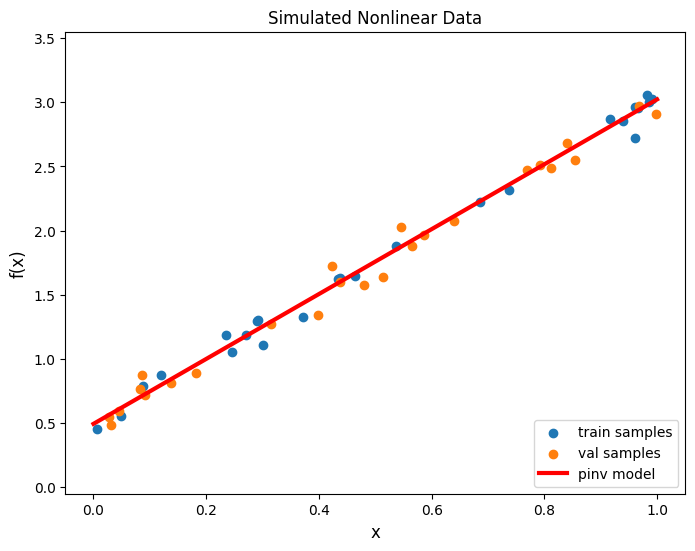

In [58]:
# Make a scatter plot of the train and validation samples using plot_samples()
fig, ax = plot_samples((x_train, y_train), (x_val, y_val))

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # Generate x_grid with shape (100, 1)

# Construct the extended version of x_grid by adding a column of ones (for the bias term)
X_grid_ext = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid), axis=1)

# Use the regression coefficients (w) to compute predictions on x_grid
y_grid = X_grid_ext @ w

# Plot the regression line onto the scatter plot
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model')
ax.legend(loc='lower right')

# No need to call display(fig) since plot_samples() already shows the plot


Now you also know how to find the regression coefficients manually using the pseudoinverse method. In the last piece of **Part 1**, we're going to find the regression via gradient descent (GD) method. Let's proceed:

# Part 1.c

In this part, we're going to implement gradient descent optimization algorithm to find regression coefficients in an iterative manner. Starting with initial regression coefficients, we're going to take small steps in directions which minimizes the mean squared error. The main steps of the algorithm are as follows:


0.   Make sure that your extended data matrices (computed in **Part 1.b**) have dimensions of (N x 2), where N is variable. We don't care about what N is, but the second dimension must be two!
1.   Initialize the regression coefficients (i.e., weights **w**) with some values, usually random or zero.
2.   Choose a step size (i.e., learning rate **lr**) which determines the size of the steps we take in the direction of minimizing the cost function (**MSE**).
3.   Repeat the following steps for **M** steps:

     1.   Compute the predicted values using the current regression coefficients and input data:
        **y_pred** = **X** * **w**
        
        *Note that **X** * **w** is matrix multiplication of **X** and **w**.*
     2.   Compute the difference between predicted and actual values (i.e., the error):
        **pred_error** = **e** = (**y_pred** - **y**)
     3.   Compute the gradient of the cost function with respect to the regression coefficients:
        **w_grad** = (transpose(**X**) * **e**) / **N**

        *Note that transpose(**X**) * **e** is matrix multiplication of transpose(**X**) and **e**, and **N** is the number of samples.*
     4.   Update the regression coefficients by subtracting the gradient times the learning rate from the current coefficients.
     
        (**w** = **w** - **w_grad** * **lr**)
     5.   Calculate the new value of the cost function (**MSE**) using the updated regression coefficients **w** and input data **X**.

4.   Return the final regression coefficients.

**Additional Info**

**X** is an N x 2 matrix. **y** is an N x 1 column vector. **w** is a 2 x 1 column vector. As a result of the matrix multiplication, **y_pred** = **X** * **w** should also have dimensions of N x 1, same with **y** !

transpose(**X**) has dimensions of 2 x N. Similarly, the matrix multiplication transpose(**X**) * **e** yields **w_grad** with dimensions 2 x 1, same with **w** !

These values are here for you to check yourself while writing your code. While developing your code, use the **shape** property of your numpy arrays sparingly!

In [60]:
M = 1000  # number of iterations
lr = 0.1  # learning rate
mse_values = []  # to keep track of MSE at each iteration
N_train = X_train_ext.shape[0]  # number of training samples

# Initialize regression coefficients (w) with zeros; shape should be (2, 1)
w_gd = np.zeros((X_train_ext.shape[1], 1))

for i in range(M):
    # 1. Compute predictions: y_pred = X_train_ext @ w_gd
    y_pred = X_train_ext @ w_gd

    # 2. Compute prediction error: error = y_pred - y_train
    error = y_pred - y_train

    # 3. Compute the gradient: grad = (X_train_ext.T @ error) / N_train
    grad = (X_train_ext.T @ error) / N_train

    # 4. Update the weights: w_gd = w_gd - lr * grad
    w_gd = w_gd - lr * grad

    # 5. Compute the current MSE: mse = sum(error^2) / (2*N_train)
    mse = np.sum(error**2) / (2 * N_train)
    mse_values.append(mse)

    # Optionally print the MSE every 100 iterations
    if i == 0 or ((i + 1) % 100 == 0):
        print('MSE error at step {}: {:.4f}'.format(i + 1, mse))


MSE error at step 1: 2.0573
MSE error at step 100: 0.0313
MSE error at step 200: 0.0075
MSE error at step 300: 0.0035
MSE error at step 400: 0.0028
MSE error at step 500: 0.0027
MSE error at step 600: 0.0026
MSE error at step 700: 0.0026
MSE error at step 800: 0.0026
MSE error at step 900: 0.0026
MSE error at step 1000: 0.0026


# As you can see, the MSE decreased step by step.

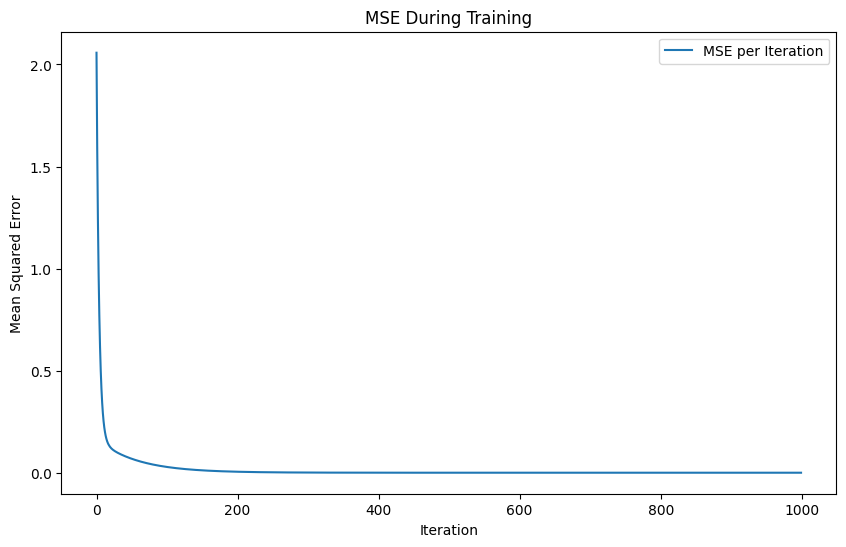

In [62]:
# Now call the plot_mse_loss() function to plot the MSE loss.
plot_mse_loss(mse_values)


Now, we'll draw the regression line found by your implementation onto the scatter plot of Dataset 1. For that, we're going to:

1.   Make a scatter plot of train and validation samples using plot_samples() function.
2.   Draw the regression line onto this plot by following the directions in the comments.

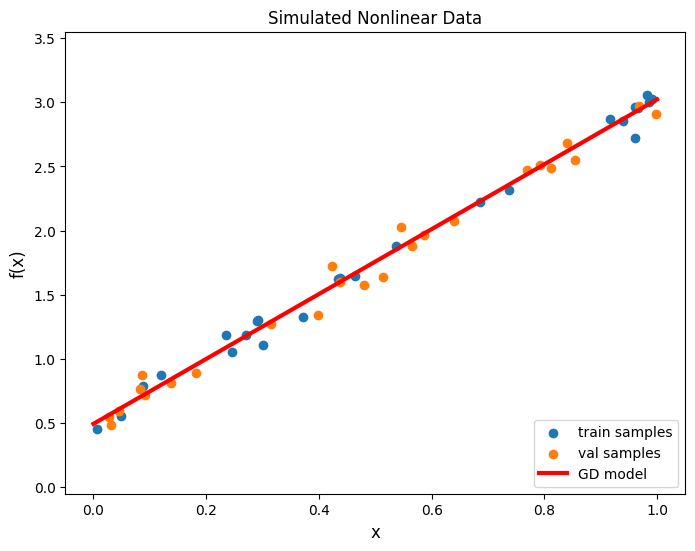

In [64]:
# Make a scatter plot of the train and validation samples using plot_samples()
fig, ax = plot_samples((x_train, y_train), (x_val, y_val))

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # Generate x_grid with shape (100, 1)

# Construct the extended version of x_grid by adding a column of ones (for the bias term)
X_grid_ext = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid), axis=1)

# Use the regression coefficients from gradient descent (w_gd) to find predictions on x_grid
y_grid = X_grid_ext @ w_gd

# Plot the regression line onto the scatter plot
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='GD model')
ax.legend(loc='lower right')
#display(fig)


# Part 2 - Data Generation

In Part 2 of the homework, we are moving from **Dataset 1** which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), to **Dataset 2** which has a **non-linear** relationship between **x** and **y**, requiring the use of non-linear regression techniques to model the relationship, such as polynomial regression.

In this part, we are going to load the data from an **.npy** file, which is a file format used to store numerical data in Python, optimized for use with the NumPy library.

In [65]:
x = np.load('dataset2_data.npy')
y = np.load('dataset2_labels.npy')

# Write code to split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes

In [66]:
# Load Dataset 2 from .npy files
x = np.load('dataset2_data.npy')
y = np.load('dataset2_labels.npy')

# Split the data into 50% training and 50% validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Print the shapes of the split datasets for verification
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


x_train shape: (25, 1)
x_val shape: (25, 1)
y_train shape: (25, 1)
y_val shape: (25, 1)



# Part 2.a

Our objective in Part 2.a is to use the sklearn library for performing linear regression on **polynomial features**. To do this,

1.   We'll use **PolynomialFeatures** from the **sklearn.preprocessing** module to expand our input data matrix **X** with polynomial features.
2.   Then, we'll use **LinearRegression** from **sklearn.linear_model** to fit the model to X.
3.   Make predictions on the validation set.

We'll evaluate the model's performance on the validation set using the **mean squared error (MSE)** metric and print the result.

Try polynomial degrees of 1, 3, 5, and 7 and comment on the best model in your report.

*-Please check the documentation of PolynomialFeatures before starting this part.*

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Try polynomial degrees 1, 3, 5, and 7
for order in [1, 3, 5, 7]:
    # Construct polynomial features of the specified degree
    poly = PolynomialFeatures(degree=order)

    # Fit and transform the training data, and transform the validation data
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)

    # Initialize and fit the linear regression model on polynomial features
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # Make predictions on the validation set
    y_val_pred_poly = model_poly.predict(X_val_poly)

    # Evaluate the model's performance using mean squared error (MSE)
    mse_sklearn_polynomial = mean_squared_error(y_val, y_val_pred_poly)
    print('Polynomial degree:', order, 'MSE of sklearn model: ', mse_sklearn_polynomial)


Polynomial degree: 1 MSE of sklearn model:  0.06362852709262727
Polynomial degree: 3 MSE of sklearn model:  0.012059223742868292
Polynomial degree: 5 MSE of sklearn model:  0.007475463079281102
Polynomial degree: 7 MSE of sklearn model:  0.011549227838827407


Now we're moving on to the plot. This part is similar to the previous ones, but be careful to pick up small differences.

By looking at the plot, we can get an idea of how well the polynomial regression model fits the data.

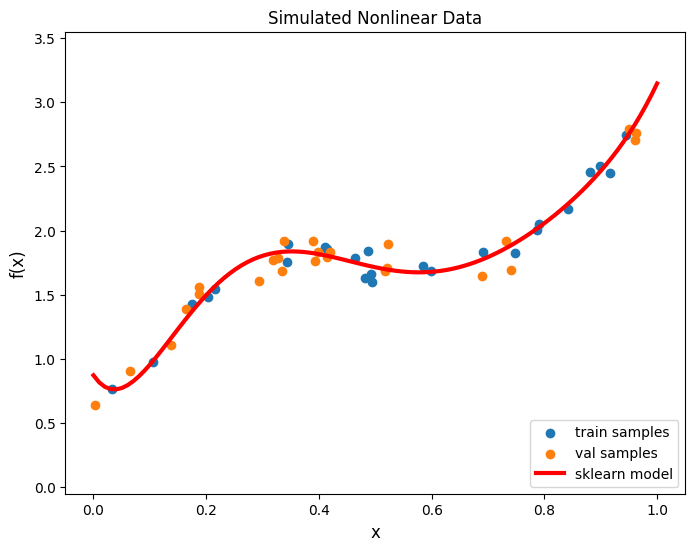

In [70]:
# Make a scatter plot of the train and validation samples using plot_samples()
fig, ax = plot_samples((x_train, y_train), (x_val, y_val))

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # do not change anything in this line

# For plotting, we'll use the polynomial regression model for a chosen degree (e.g., degree 3)
# (Assuming you have already defined and fitted 'poly' and 'model_poly' for degree 3 in the previous cell)
X_grid_poly = poly.transform(x_grid)  # transform x_grid the same way as the validation data
y_grid = model_poly.predict(X_grid_poly)  # predict using the fitted polynomial regression model

ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model')
ax.legend(loc='lower right')
# display(fig)


# Part 2.b

In this part, we will implement our own polynomial regression algorithm to find the optimal regression coefficients. The main steps are as follows:

1.   Choose the degree of the polynomial regression as **3**. Above, you were asked to vary this and choose the best model (best polynomial degree) according to validation set; however in this part the aim is just to learn the implementation.
2.   Constructing the data matrix **X** that includes a column of ones for the bias (intercept) term.
3.   Taking the pseudo-inverse (pinv) of **X**.
4.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**.

*(Note that pinv(**X**) is a (degree+1) x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions (degree+1) x 1)*

.

.

.

**Illustration for Step 2 of algorithm (for degree 3)**

From $\quad x = \begin{bmatrix}
x_1 \\ x_2\\ \vdots \\ x_N \\
\end{bmatrix}$, we want to obtain $\quad X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & x_N^3 \\
\end{bmatrix}$.


where N is the number of samples (in either train or val dataset), and each column holds a power of **x**, starting from 0-th power in the first column, till the **degree** you specified.

In [72]:
from numpy.linalg import pinv

# 1. Construct the data matrix for training by adding columns for x^0, x^1, x^2, and x^3
X_train_poly = np.concatenate((np.ones((x_train.shape[0], 1)), x_train, x_train**2, x_train**3), axis=1)
# Construct the data matrix for validation in the same way
X_val_poly = np.concatenate((np.ones((x_val.shape[0], 1)), x_val, x_val**2, x_val**3), axis=1)

# Print the shapes of the data matrices to check (should be (N, 4))
print("X_train_poly shape:", X_train_poly.shape)
print("X_val_poly shape:", X_val_poly.shape)

# 3.1. Find the pseudoinverse of the training data matrix
X_train_poly_pinv = pinv(X_train_poly)

# 3.2. Compute the regression coefficients: w = pinv(X) * y
w_poly_manual = X_train_poly_pinv @ y_train
print("Regression coefficients (manual, degree 3):", w_poly_manual.ravel())

# Make predictions on the validation set: y_pred = X_val_poly * w
y_val_pred_manual_poly = X_val_poly @ w_poly_manual

# Evaluate the model's performance using mean squared error (MSE)
N_val = x_val.shape[0]
mse_manual_poly = np.sum((y_val_pred_manual_poly - y_val)**2) / (2 * N_val)
print("MSE of manual polynomial model: ", mse_manual_poly)


X_train_poly shape: (25, 4)
X_val_poly shape: (25, 4)
Regression coefficients (manual, degree 3): [  0.39883796   8.68921502 -18.07027007  12.18401084]
MSE of manual polynomial model:  0.006029611871434275


Make a plot

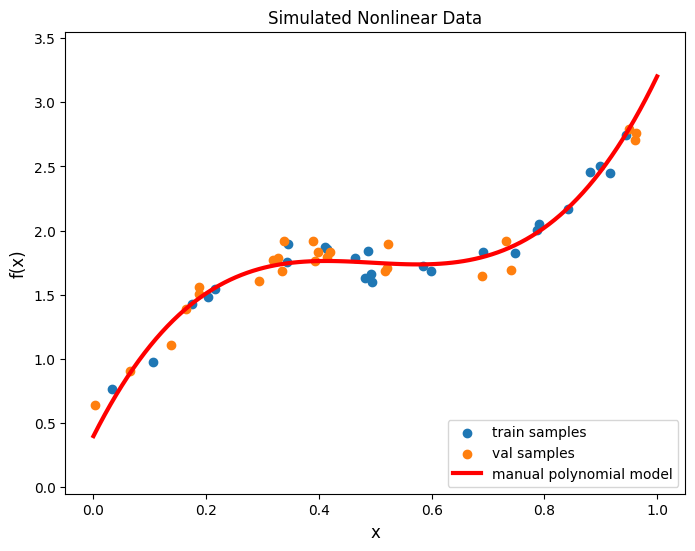

In [74]:
# Make a scatter plot of the train and validation samples using plot_samples()
fig, ax = plot_samples((x_train, y_train), (x_val, y_val))

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # do not change anything in this line

# Construct the extended version of x_grid for degree 3 polynomial (x^0, x^1, x^2, x^3)
X_grid_poly = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid, x_grid**2, x_grid**3), axis=1)

# Using the regression coefficients from the manual polynomial regression, find predictions on x_grid
y_grid = X_grid_poly @ w_poly_manual

# Plot the regression line onto the scatter plot
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='manual polynomial model')
ax.legend(loc='lower right')
# display(fig)


# Report

*   Prepare a PDF report with the following and **include a link to your Colab Notebook at the top. making sure the link public** (You won't receive points from your notebook if this link is missing or not public)!

*   Your report should contain sections in the same order as you're seeing in this notebook and labeled as **Part 1.a Results** etc). **In each part, you should include the regression coefficients you have found in that part and all the plots and MSE errors.**

*   In Part 1, you should comment on whether the gradient descent solution is the same (or very close) to solutions obtained for Part1.a and b. If not, add a line of explanation as to why you think it is not.

*   In Part 2, comment on the effect of the **degree** parameter. What happens when it is chosen too small or too big? What do you think is the optimal **degree** value, and why? Discuss from the perspective of **underfitting**/**overfitting**.